# PivotPy

> A Python Processing Tool for Vasp Input/Output. A CLI is available in Powershell, see [Vasp2Visual](https://github.com/massgh/Vasp2Visual).


[![Run in Azure](https://notebooks.azure.com/launch.png)](https://testazurenotebooks-massaz.notebooks.azure.com/j/notebooks/test.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/massgh/pivotpy/blob/master/test.ipynb)

In [ ]:
#hide_input
from pivotpy.utils import nav_links 
nav_links(0)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index●&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` Example&nbsp;](https://massgh.github.io/pivotpy/Example)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` SpinProjectedSurfaces&nbsp;](https://massgh.github.io/pivotpy/SpinProjectedSurfaces)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
> [&nbsp;`▶` MainAPI&nbsp;](https://massgh.github.io/pivotpy/MainAPI)  


## Install
`pip install pivotpy`

## How to use
- Use commnad `pivotpy` in regular terminal to quickly launch documentation any time. 
- See [Full Documentation](https://massgh.github.io/pivotpy/).
- See a [Calculation Example](https://massgh.github.io/pivotpy/Example.html)
- For CLI, use [Vasp2Visual](https://github.com/massgh/Vasp2Visual).
- See [PDF Slides](https://github.com/massgh/InteractiveHTMLs/tree/master/docs/IPySlides.pdf) for detailed introduction.

## CLI commnds
- Use `pivotpy` in system terminal to launch DOCS. 
- Use `pivotpy_get_poscar` to download POSCAR.
- Use `pivotpy_get_kpath` to create fine controlled KPATH. 

## Plot in Terminal without GUI
Use `pp.plt2text(colorful=True/False)` after matplotlib's code and your figure will appear in terminal. You need to zoom out alot to get a good view like below.

Tip: Use file [matplotlib2terminal.py](https://gist.github.com/massgh/d5cc44ad32510d3ff58cfefd75c6884e) on github independent of this package to plot in terminal. 
![IMG](terminal.jpg)

# Ipywidgets-based GUI
See GIF here:
![GIF](widget.gif) 

# Live Slides in Jupyter Notebook
Navigate to  [ipyslides](https://github.com/massgh/ipyslides) or do `pip install ipyslides` to create beautiful data driven presentation in Jupyter Notebook.

In [ ]:
import os, pivotpy as pp
with pp.set_dir('E:/Research/graphene_example/ISPIN_1/bands'):
    vr = pp.Vasprun(elim=[-5,5])

print('Try Follwing Methods:')
for v in dir(vr):
    if not v.startswith('_'):
        print('vr.'+v)

Loading from PowerShell Exported Data...
Try Follwing Methods:
vr.data
vr.elim
vr.get_band_info
vr.get_en_diff
vr.iplot_dos_lines
vr.iplot_rgb_lines
vr.kticks
vr.poscar
vr.select
vr.splot_bands
vr.splot_color_lines
vr.splot_dos_lines
vr.splot_en_diff
vr.splot_rgb_lines
vr.to_json
vr.to_pickle


## Matplotlib's static plots
- Add anything from legend,colorbar, colorwheel. In below figure, all three are shown.
- Use aliases such as sbands, sdos,srgb,irgb,scolor,idos for plotting. 

In [ ]:
#collapse_input
import pivotpy as pp, numpy as np
import matplotlib.pyplot as plt 
vr1=pp.Vasprun('E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml')
vr2=pp.Vasprun('E:/Research/graphene_example/ISPIN_2/dos/vasprun.xml')
axs = pp.get_axes(ncols=3,widths=[2,1,2.2],sharey=True,wspace=0.05,figsize=(8,2.6))
elements=[0,[0],[0,1]]
orbs=[[0],[1],[2,3]]
labels=['s','$p_z$','$(p_x+p_y)$']
ti_cks=dict(ktick_inds=[0,30,60,-1],ktick_vals=['Γ','M','K','Γ'])
args_dict=dict(elements=elements,orbs=orbs,labels=labels,elim=[-20,15])
vr1.splot_bands(ax=axs[0],**ti_cks,elim=[-20,15])
vr1.splot_rgb_lines(ax=axs[2],**args_dict,**ti_cks,colorbar=True,)
vr2.splot_dos_lines(ax=axs[1],vertical=True,spin='both',include_dos='pdos',**args_dict,legend_kwargs={'ncol': 3},colormap='RGB_m')
axs[2].color_wheel(xy=(0.7,1.15),scale=0.2,labels=[l+'$^{⇅}$' for l in labels])
pp._show() 

 Given 0 at position 1 of sequence => 'C': range(0, 2). To just pick one ion, write it as [0].


## Interactive plots using plotly

In [ ]:
args_dict['labels'] = ['s','p_z','p_x+p_y']
fig1 = vr1.iplot_rgb_lines(**args_dict)
#pp.iplot2html(fig1) #Do inside Google Colab, fig1 inside Jupyter
from IPython.display import Markdown
Markdown("[See Interactive Plot](https://massgh.github.io/InteractiveHTMLs/iGraphene.html)")

[See Interactive Plot](https://massgh.github.io/InteractiveHTMLs/iGraphene.html)

## Brillouin Zone (BZ) Processing
- Look in `pivotpy.sio` module or `pivotpy.api.POSCAR` class for details on generating mesh and path of KPOINTS as well as using Materials Projects' API to get POSCAR right in the working folder. Below is a screenshot of interactive BZ plot. You can `double click` on blue points and hit `Ctrl + C` to copy the high symmetry points relative to reciprocal lattice basis vectors. 
- Same color points lie on a sphere, with radius decreasing as red to blue and  gamma point in gold color. These color help distinguishing points but the points not always be equivalent, for example in FCC, there are two points on mid of edges connecting square-hexagon and hexagon-hexagon at equal distance from center but not the same points. 
- Any colored point's hover text is in gold background.      
#### Look the output of `pivotpy.sio.splot_bz`.
![BZ](docs/images/3bz.jpg)
![Energy](docs/images/energy.jpg)
[See Interactive BZ Plot](https://massgh.github.io/InteractiveHTMLs/BZ.html)

## Plotting Two Calculations Side by Side 
- Here we will use `shift_kpath` to demonstrate plot of two calculations on same axes side by side

Loading from PowerShell Exported Data...


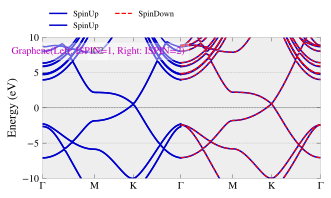

In [ ]:
#nbdev_collapse_input
import matplotlib.pyplot as plt
import pivotpy as pp 
plt.style.use('bmh')
vr1=pp.Vasprun('E:/Research/graphene_example/ISPIN_1/bands/vasprun.xml')
shift_kpath=vr1.data.kpath[-1] # Add last point from first export in second one.
vr2=pp.Vasprun('E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml',shift_kpath=shift_kpath,try_pwsh=False)
last_k=vr2.data.kpath[-1]
axs=pp.get_axes(figsize=(5,2.6))
K_all=[*vr1.data.kpath,*vr2.data.kpath] # Merge kpath for ticks
kticks=[K_all[i] for i in [0,30,60,90,120,150,-1]]
ti_cks=dict(xticks=kticks,xt_labels=['Γ','M','K','Γ','M','K','Γ'])
vr1.splot_bands(ax=axs)
vr2.splot_bands(ax=axs,txt='Graphene(Left: ISPIN=1, Right: ISPIN=2)',ctxt='m')
axs.modify_axes(xlim=[0,last_k],ylim=[-10,10],**ti_cks)
pp._show()

## Interpolation 
Amost every bandstructure and DOS plot function has an argument `interp_nk` which is a dictionary with keys `n` (Number of additional points between adjacent points) and `k` (order of interpolation 0-3). `n > k` must hold.

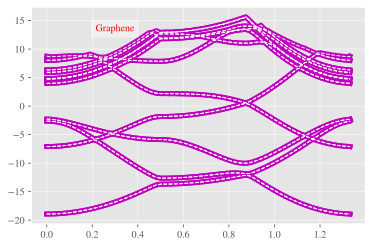

In [ ]:
#collapse_input
import pivotpy as pp, matplotlib.pyplot as plt
plt.style.use('ggplot')
k = vr1.data.kpath
ef = vr1.data.bands.E_Fermi
evals = vr1.data.bands.evals-ef
#Let's interpolate our graph to see effect. It is useful for colored graphs.
knew,enew=pp.interpolate_data(x=k,y=evals,n=10,k=3)
plot = plt.plot(k,evals,'m',lw=5,label='real data')
plot = plt.plot(k,evals,'w',lw=1,label='interpolated',ls='dashed')
pp.splots.add_text(ax=plt.gca(),txts='Graphene')

## LOCPOT,CHG Visualization
check out the class `pivotpy.LOCPOT` to visulize local potential/charge and magnetization in a given direction.

## Running powershell commands from python.
Some tasks are very tideious in python while just a click way in powershell. See below, and try to list processes in python yourself to see the difference!

In [ ]:
pp.utils.ps2std(ps_command='(Get-Process)[0..4]')

 NPM(K)    PM(M)      WS(M)     CPU(s)      Id  SI Pr
                                                   oc
                                                   es
                                                   sN
                                                   am
                                                   e
 ------    -----      -----     ------      --  -- --
20     6.47       1.84       0.23    3496   1 A…
6     1.46       4.67       0.00    6864   0 A…
19     8.88      15.15       0.00    4816   0 A…
28    44.29      28.74      22.25    3844   1 A…
9     1.86       6.35       0.05   10072   1 A…


## Advancaed: Poweshell Cell/Line Magic `%%ps/%ps`
- You can create a IPython cell magic to run powershell commands directly in IPython Shell/Notebook (Powershell core installation required).
- Cell magic can be assigned to a variable `foo` by `%%ps --out foo`
- Line magic can be assigned to a variable by `foo = %ps powershell_command`

Put below code in ipython profile's startup file (create one) "~/.ipython/profile_default/startup/powershell_magic.py"
```python
from IPython.core.magic import register_line_cell_magic
from IPython import get_ipython
@register_line_cell_magic
def ps(line, cell=None):
    if cell:
        return get_ipython().run_cell_magic('powershell',line,cell)
    else:
        get_ipython().run_cell_magic('powershell','--out posh_output',line)
        return posh_output.splitlines()
``` 
Additionally you need to add following lines in "~/.ipython/profile_default/ipython_config.py" file to make above magic work.
```python
from traitlets.config.application import get_config
c = get_config()
c.ScriptMagics.script_magics = ['powershell']
c.ScriptMagics.script_paths = {
    'powershell' : 'powershell.exe -noprofile -command -',
    'pwsh': 'pwsh.exe -noprofile -command -'
}
```

In [ ]:
%%ps 
Get-ChildItem 'E:\Research\graphene_example\'



    Directory: E:\Research\graphene_example


Mode                 LastWriteTime         Length Nam
                                                  e  
----                 -------------         ------ ---
da----        11/28/2021   8:04 PM                ISP
                                                  IN_
                                                  1  
da----          5/9/2020   1:05 PM                ISP
                                                  IN_
                                                  2  
-a----          5/9/2020   1:01 PM          75331 OUT
                                                  CAR
-a----          5/9/2020   1:01 PM         240755 vas
                                                  pru
                                                  n.x
                                                  ml 




In [ ]:
x = %ps (Get-ChildItem 'E:\Research\graphene_example\').Name
x

['ISPIN_1', 'ISPIN_2', 'OUTCAR', 'vasprun.xml']

In [ ]:
#hide
#from nbdev.export import *
#notebook2script()

[Functions Reference](functions.md)

In [ ]:
#hide_input
from pivotpy.utils import nav_links 
nav_links(0)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index●&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` Example&nbsp;](https://massgh.github.io/pivotpy/Example)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` SpinProjectedSurfaces&nbsp;](https://massgh.github.io/pivotpy/SpinProjectedSurfaces)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
> [&nbsp;`▶` MainAPI&nbsp;](https://massgh.github.io/pivotpy/MainAPI)  
